In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1899    2928.701904
1900    2949.359619
1901    2881.157959
1902    3037.056641
1903    2945.131104
Name: Close, Length: 1904, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 74ms/step - loss: 0.0520 - val_loss: 0.0041
Epoch 2/100
23/23 [==============================] - 1s 48ms/step - loss: 0.0059 - val_loss: 6.5002e-04
Epoch 3/100
23/23 [==============================] - 1s 48ms/step - loss: 0.0011 - val_loss: 6.9762e-04
Epoch 4/100
23/23 [==============================] - 1s 60ms/step - loss: 8.1959e-04 - val_loss: 5.5572e-04
Epoch 5/100
23/23 [==============================] - 2s 82ms/step - loss: 7.6964e-04 - val_loss: 5.4399e-04
Epoch 6/100
23/23 [==============================] - 2s 66ms/step - loss: 7.2815e-04 - val_loss: 5.2041e-04
Epoch 7/100
23/23 [==============================] - 1s 49ms/step - loss: 7.0085e-04 - val_loss: 4.8936e-04
Epoch 8/100
23/23 [==============================] - 1s 48ms/step - loss: 6.6232e-04 - val_loss: 4.6944e-04
Epoch 9/100
23/23 [==============================] - 1s 49ms/step - loss: 6.4304e-04 - val_loss: 4.6891e-04
Epoch 10/100
23/23 [========================

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

9/9 [==============================] - 0s 11ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred_test - y_test)/np.abs(y_pred_test))
print('Testing MAPE:', test_mape)

Testing RMSE: 83.39555862323208
Testing MAE: 57.86142578925785
Testing MAPE: 0.02303495277443403


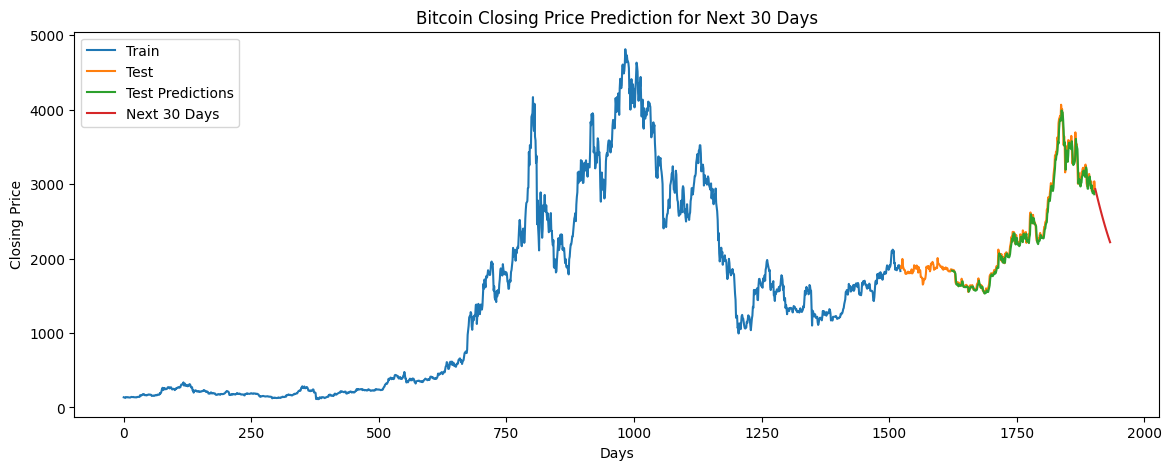

Predicted closing prices for the next 30 days:
[2932.8582 2906.8118 2878.816  2850.8264 2822.945  2795.2283 2767.7341
 2740.4949 2713.5337 2686.863  2660.4897 2634.4177 2608.6553 2583.206
 2558.0757 2533.266  2508.779  2484.613  2460.7698 2437.2502 2414.055
 2391.1802 2368.6301 2346.3982 2324.4844 2302.883  2281.5908 2260.6055
 2239.9192 2219.5298]


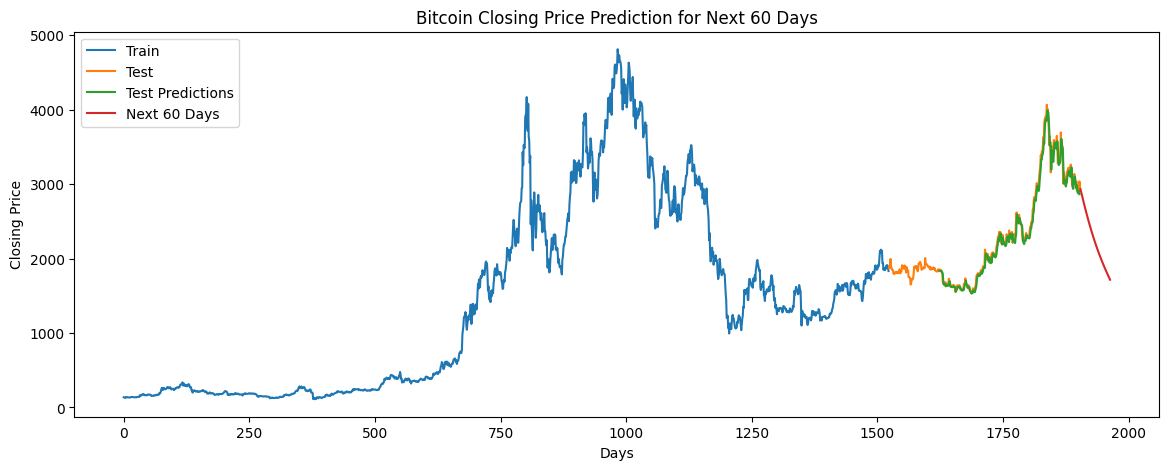

Predicted closing prices for the next 60 days:
[2932.8582 2906.8118 2878.816  2850.8264 2822.945  2795.2283 2767.7341
 2740.4949 2713.5337 2686.863  2660.4897 2634.4177 2608.6553 2583.206
 2558.0757 2533.266  2508.779  2484.613  2460.7698 2437.2502 2414.055
 2391.1802 2368.6301 2346.3982 2324.4844 2302.883  2281.5908 2260.6055
 2239.9192 2219.5298 2199.4333 2179.6228 2160.0935 2140.8374 2121.8508
 2103.1277 2084.6614 2066.4463 2048.4736 2030.7367 2013.2306 1995.9474
 1978.8779 1962.0194 1945.3639 1928.9048 1912.6359 1896.5511 1880.6459
 1864.9133 1849.3486 1833.9459 1818.6996 1803.6053 1788.6587 1773.8531
 1759.1849 1744.6498 1730.2423 1715.9596]


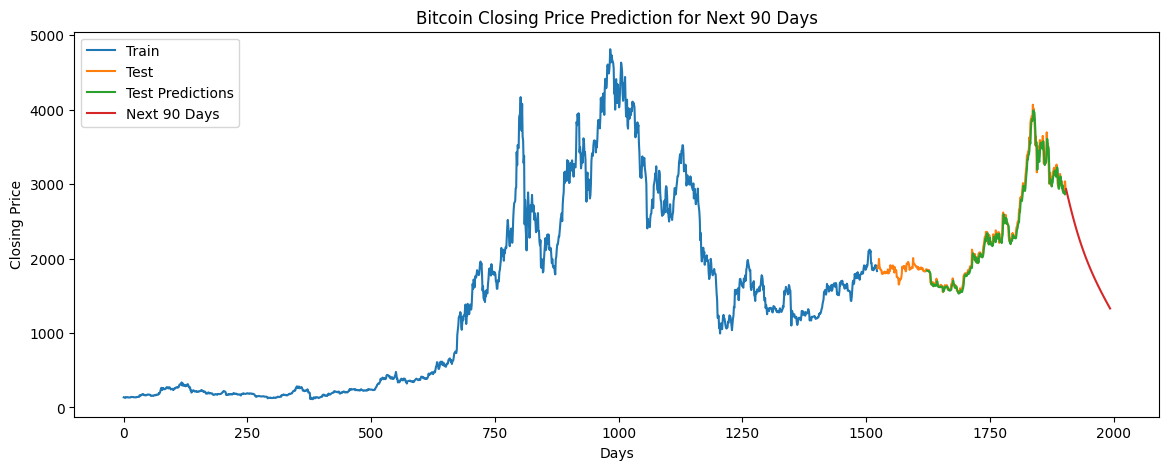

Predicted closing prices for the next 90 days:
[2932.8582 2906.8118 2878.816  2850.8264 2822.945  2795.2283 2767.7341
 2740.4949 2713.5337 2686.863  2660.4897 2634.4177 2608.6553 2583.206
 2558.0757 2533.266  2508.779  2484.613  2460.7698 2437.2502 2414.055
 2391.1802 2368.6301 2346.3982 2324.4844 2302.883  2281.5908 2260.6055
 2239.9192 2219.5298 2199.4333 2179.6228 2160.0935 2140.8374 2121.8508
 2103.1277 2084.6614 2066.4463 2048.4736 2030.7367 2013.2306 1995.9474
 1978.8779 1962.0194 1945.3639 1928.9048 1912.6359 1896.5511 1880.6459
 1864.9133 1849.3486 1833.9459 1818.6996 1803.6053 1788.6587 1773.8531
 1759.1849 1744.6498 1730.2423 1715.9596 1701.7961 1687.7489 1673.8145
 1659.9893 1646.2693 1632.6516 1619.1327 1605.7095 1592.3792 1579.1385
 1565.9854 1552.9167 1539.9302 1527.0234 1514.1934 1501.4388 1488.7572
 1476.1461 1463.6036 1451.1282 1438.7178 1426.3702 1414.0846 1401.8582
 1389.6903 1377.5786 1365.5221 1353.519  1341.568  1329.6678]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 4s 76ms/step - loss: 0.0226 - val_loss: 8.0222e-04
Epoch 2/100
20/20 [==============================] - 1s 64ms/step - loss: 0.0019 - val_loss: 8.0754e-04
Epoch 3/100
20/20 [==============================] - 2s 93ms/step - loss: 9.1476e-04 - val_loss: 3.5411e-04
Epoch 4/100
20/20 [==============================] - 1s 65ms/step - loss: 7.2818e-04 - val_loss: 3.3035e-04
Epoch 5/100
20/20 [==============================] - 1s 52ms/step - loss: 6.9128e-04 - val_loss: 3.4599e-04
Epoch 6/100
20/20 [==============================] - 1s 53ms/step - loss: 6.7271e-04 - val_loss: 3.0810e-04
Epoch 7/100
20/20 [==============================] - 1s 51ms/step - loss: 6.7275e-04 - val_loss: 3.0468e-04
Epoch 8/100
20/20 [==============================] - 1s 52ms/step - loss: 6.2224e-04 - val_loss: 3.1045e-04
Epoch 9/100
20/20 [==============================] - 1s 52ms/step - loss: 6.0486e-04 - val_loss: 2.9018e-04
Epoch 10/100
20/20 [================

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 11ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 2245.5466280670025
Testing MAE: 2160.4004556524255
Testing MAPE: 0.9997844853457912


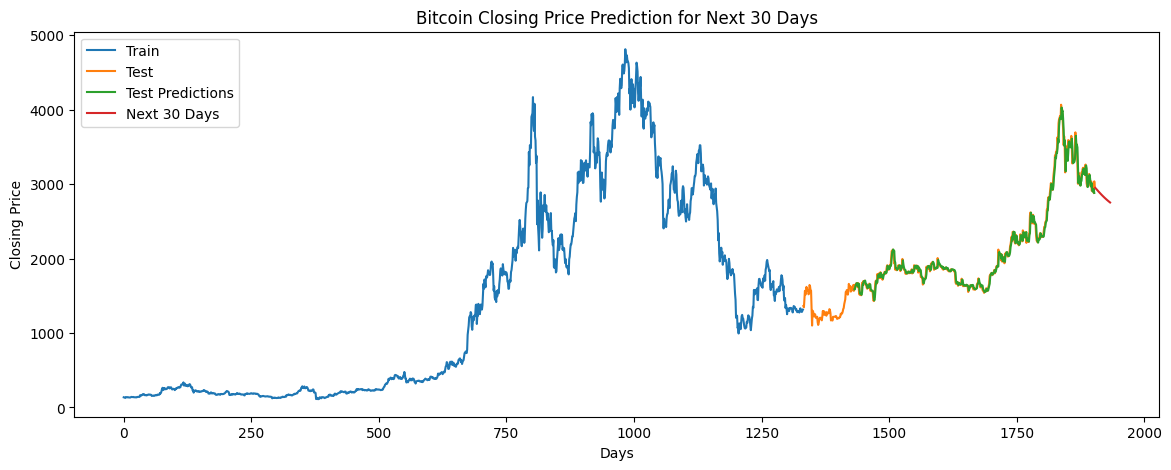

Predicted closing prices for the next 30 days:
[2949.742  2942.0032 2934.314  2926.6587 2918.977  2911.3025 2903.6614
 2896.072  2888.5488 2881.104  2873.7463 2866.4822 2859.3164 2852.2534
 2845.293  2838.439  2831.6914 2825.0496 2818.5144 2812.0845 2805.7595
 2799.5369 2793.4167 2787.3972 2781.4766 2775.653  2769.9255 2764.2908
 2758.7483 2753.2947]


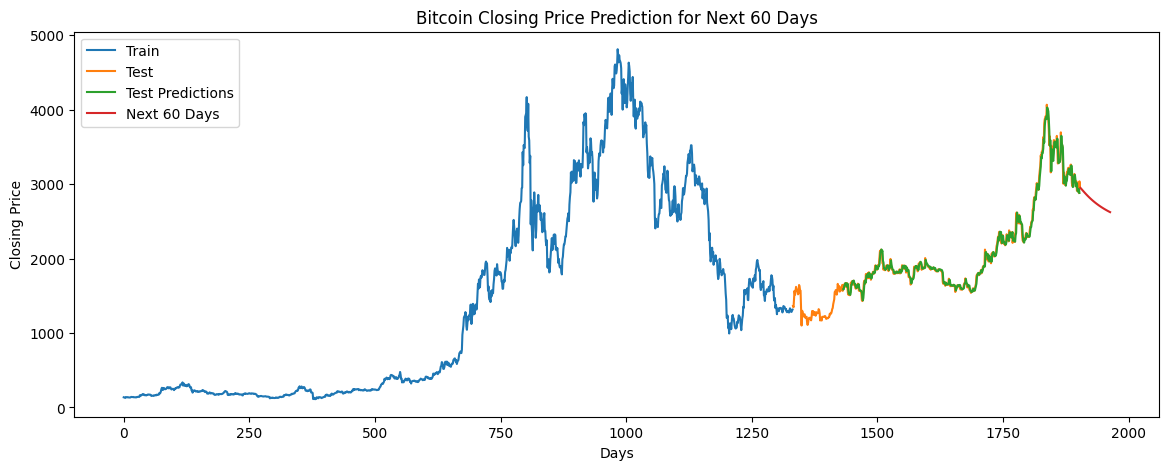

Predicted closing prices for the next 60 days:
[2949.742  2942.0032 2934.314  2926.6587 2918.977  2911.3025 2903.6614
 2896.072  2888.5488 2881.104  2873.7463 2866.4822 2859.3164 2852.2534
 2845.293  2838.439  2831.6914 2825.0496 2818.5144 2812.0845 2805.7595
 2799.5369 2793.4167 2787.3972 2781.4766 2775.653  2769.9255 2764.2908
 2758.7483 2753.2947 2747.9307 2742.6526 2737.4595 2732.3489 2727.3196
 2722.3696 2717.4978 2712.7021 2707.9812 2703.334  2698.7576 2694.2517
 2689.8137 2685.4434 2681.139  2676.899  2672.7224 2668.6077 2664.5537
 2660.5593 2656.6235 2652.7449 2648.922  2645.1548 2641.4414 2637.7808
 2634.1726 2630.6145 2627.108  2623.65  ]


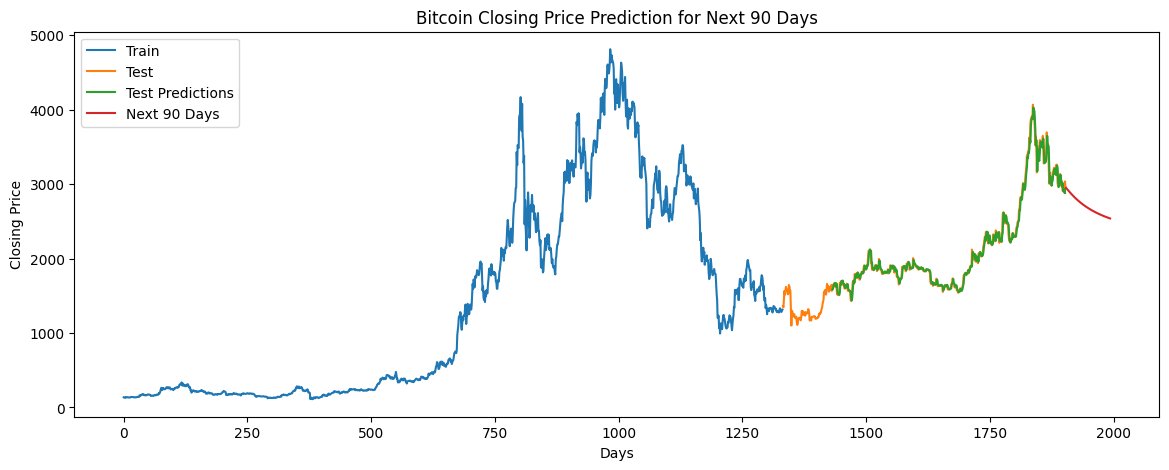

Predicted closing prices for the next 90 days:
[2949.742  2942.0032 2934.314  2926.6587 2918.977  2911.3025 2903.6614
 2896.072  2888.5488 2881.104  2873.7463 2866.4822 2859.3164 2852.2534
 2845.293  2838.439  2831.6914 2825.0496 2818.5144 2812.0845 2805.7595
 2799.5369 2793.4167 2787.3972 2781.4766 2775.653  2769.9255 2764.2908
 2758.7483 2753.2947 2747.9307 2742.6526 2737.4595 2732.3489 2727.3196
 2722.3696 2717.4978 2712.7021 2707.9812 2703.334  2698.7576 2694.2517
 2689.8137 2685.4434 2681.139  2676.899  2672.7224 2668.6077 2664.5537
 2660.5593 2656.6235 2652.7449 2648.922  2645.1548 2641.4414 2637.7808
 2634.1726 2630.6145 2627.108  2623.65   2620.2395 2616.8767 2613.561
 2610.2905 2607.0647 2603.882  2600.7437 2597.6472 2594.5928 2591.5793
 2588.606  2585.6726 2582.7778 2579.921  2577.1023 2574.321  2571.576
 2568.8662 2566.1921 2563.552  2560.9465 2558.3745 2555.8352 2553.3286
 2550.8538 2548.4097 2545.9973 2543.6157 2541.2632 2538.9404]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 4s 97ms/step - loss: 0.0733 - val_loss: 0.0080
Epoch 2/100
17/17 [==============================] - 1s 56ms/step - loss: 0.0127 - val_loss: 0.0015
Epoch 3/100
17/17 [==============================] - 1s 55ms/step - loss: 0.0018 - val_loss: 6.7170e-04
Epoch 4/100
17/17 [==============================] - 1s 56ms/step - loss: 0.0011 - val_loss: 4.8382e-04
Epoch 5/100
17/17 [==============================] - 1s 55ms/step - loss: 8.6224e-04 - val_loss: 3.6405e-04
Epoch 6/100
17/17 [==============================] - 1s 57ms/step - loss: 8.5956e-04 - val_loss: 3.8785e-04
Epoch 7/100
17/17 [==============================] - 1s 54ms/step - loss: 7.9693e-04 - val_loss: 3.3690e-04
Epoch 8/100
17/17 [==============================] - 1s 54ms/step - loss: 7.4822e-04 - val_loss: 3.4284e-04
Epoch 9/100
17/17 [==============================] - 1s 54ms/step - loss: 7.4395e-04 - val_loss: 3.4070e-04
Epoch 10/100
17/17 [==============================] 

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 11ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 2019.2574956393285
Testing MAE: 1924.673087564826
Testing MAPE: 0.9997791843075431


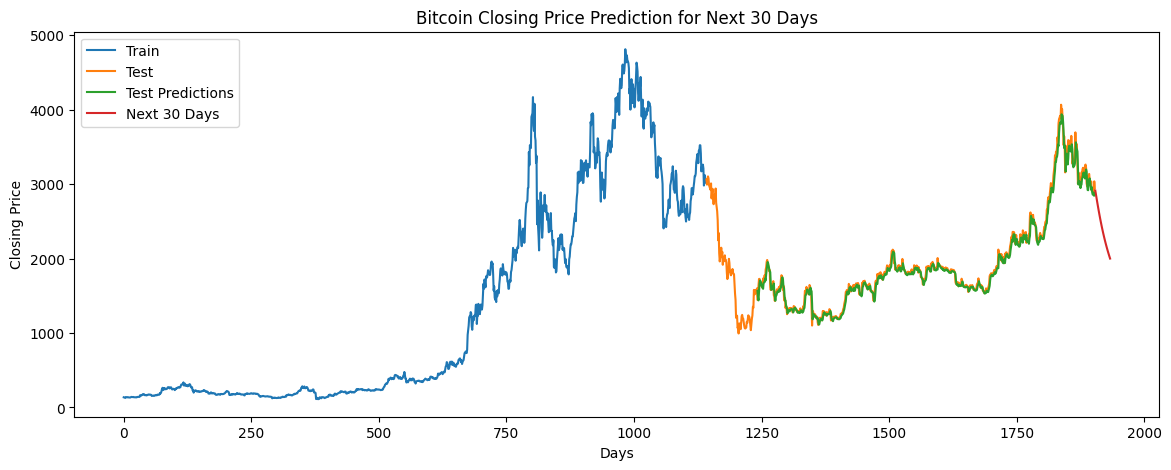

Predicted closing prices for the next 30 days:
[2913.9785 2874.0334 2832.587  2791.0867 2750.0679 2709.7463 2670.2412
 2631.6174 2593.9175 2557.165  2521.37   2486.5347 2452.6506 2419.707
 2387.6846 2356.563  2326.3176 2296.9219 2268.348  2240.5674 2213.5505
 2187.2673 2161.6892 2136.7864 2112.5305 2088.8945 2065.85   2043.3721
 2021.4346 2000.015 ]


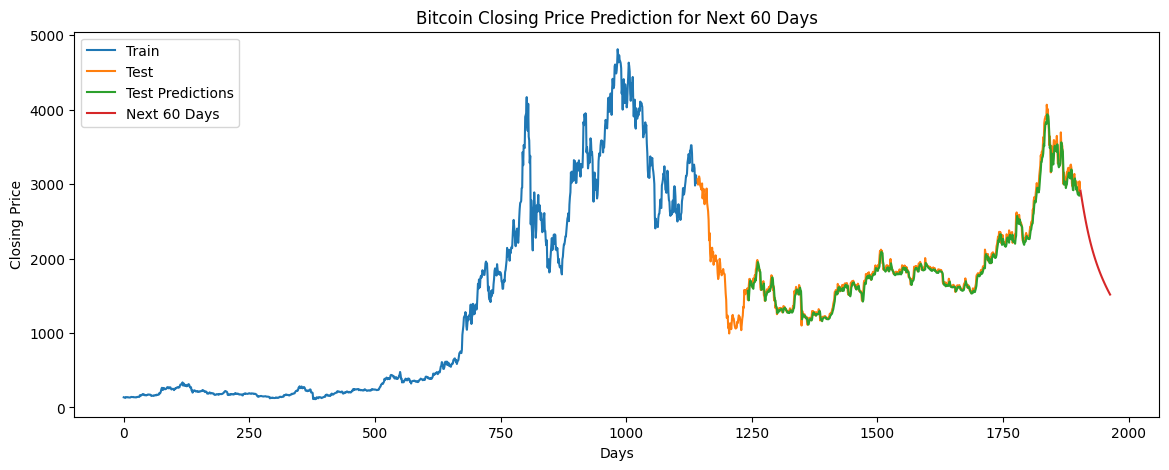

Predicted closing prices for the next 60 days:
[2913.9785 2874.0334 2832.587  2791.0867 2750.0679 2709.7463 2670.2412
 2631.6174 2593.9175 2557.165  2521.37   2486.5347 2452.6506 2419.707
 2387.6846 2356.563  2326.3176 2296.9219 2268.348  2240.5674 2213.5505
 2187.2673 2161.6892 2136.7864 2112.5305 2088.8945 2065.85   2043.3721
 2021.4346 2000.015  1979.0889 1958.636  1938.6345 1919.0652 1899.9083
 1881.1473 1862.765  1844.7454 1827.0731 1809.7339 1792.7153 1776.004
 1759.5874 1743.4553 1727.5961 1712.0001 1696.6571 1681.5585 1666.6959
 1652.0607 1637.6453 1623.4425 1609.445  1595.6458 1582.0394 1568.6189
 1555.3792 1542.3142 1529.4186 1516.6871]


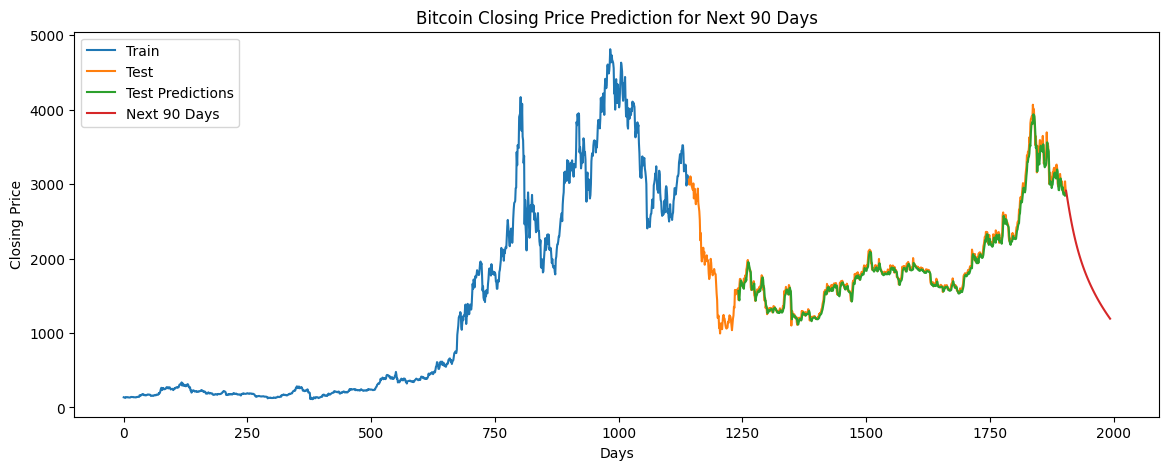

Predicted closing prices for the next 90 days:
[2913.9785 2874.0334 2832.587  2791.0867 2750.0679 2709.7463 2670.2412
 2631.6174 2593.9175 2557.165  2521.37   2486.5347 2452.6506 2419.707
 2387.6846 2356.563  2326.3176 2296.9219 2268.348  2240.5674 2213.5505
 2187.2673 2161.6892 2136.7864 2112.5305 2088.8945 2065.85   2043.3721
 2021.4346 2000.015  1979.0889 1958.636  1938.6345 1919.0652 1899.9083
 1881.1473 1862.765  1844.7454 1827.0731 1809.7339 1792.7153 1776.004
 1759.5874 1743.4553 1727.5961 1712.0001 1696.6571 1681.5585 1666.6959
 1652.0607 1637.6453 1623.4425 1609.445  1595.6458 1582.0394 1568.6189
 1555.3792 1542.3142 1529.4186 1516.6871 1504.1157 1491.6991 1479.4327
 1467.313  1455.3353 1443.4952 1431.7898 1420.2148 1408.7671 1397.4434
 1386.2397 1375.1533 1364.1815 1353.3209 1342.5685 1331.9216 1321.3784
 1310.9352 1300.59   1290.3406 1280.1842 1270.1188 1260.1426 1250.2528
 1240.4474 1230.7249 1221.083  1211.5199 1202.034  1192.623 ]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())